# Lecture 23

What is **clustering**?

- It is the task of identifying similar instances and assigning them to *clusters*, or groups of similar instances

Note that we don't have a label!

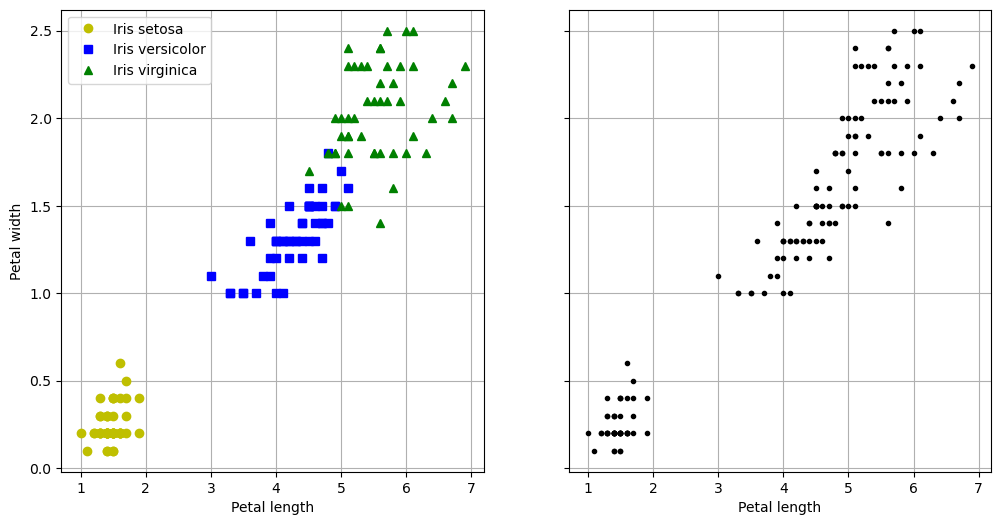

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

- Figure on the left is the iris dataset, where each instance’s species (i.e., its class) is represented with a different marker
    - It is a labeled dataset, for which classification algorithms are well suited
- On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore

- This is where clustering algorithms step in: many of them can easily detect the **lower-left cluster**
    - but it is not so obvious that the upper-right cluster is composed of two distinct subclusters
    - the dataset has two additional features (sepal length and width) that are not represented here, and clustering algorithms can make good use of all features
        - so they identify the three clusters fairly well

Let's assume you know how to cluster the observations on the right into three classes

What kind of applications can you use this clustering algorithm?

- There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters

- We will look at two popular clustering algorithms, k-means and explore some of their applications

## k-means: Lloyd-Forgy algorithm

In [11]:
from sklearn.datasets import make_blobs
import numpy as np

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

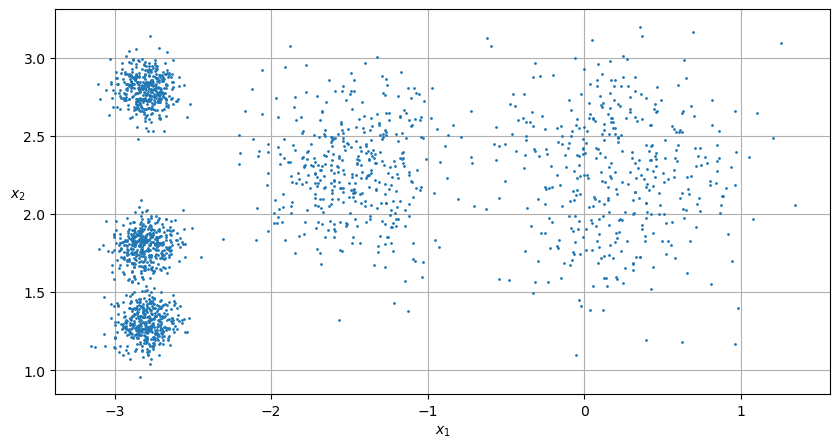

In [12]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(10, 5))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

- Consider the unlabeled dataset above
    - see five blobs of instances
- The k-means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations

- Let’s train a k-means clusterer on this dataset
    - It will try to find each blob's center and assign each instance to the closest blob

In [13]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- Note that you have to specify the number of clusters $k$ that the algorithm must find
    - in general it is **not that easy**

In [14]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [15]:
set(y_pred)

{0, 1, 2, 3, 4}

- Each instance will be assigned to one of the five clusters
- In the context of clustering, an instance's *label* is the index of the cluster to which the algorithm assigns this instance

We can also take a look at the five centroids that the algorithm found:

In [16]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

You can easily assign new instances to the cluster whose centroid is closest:

In [17]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**Decision boundary**

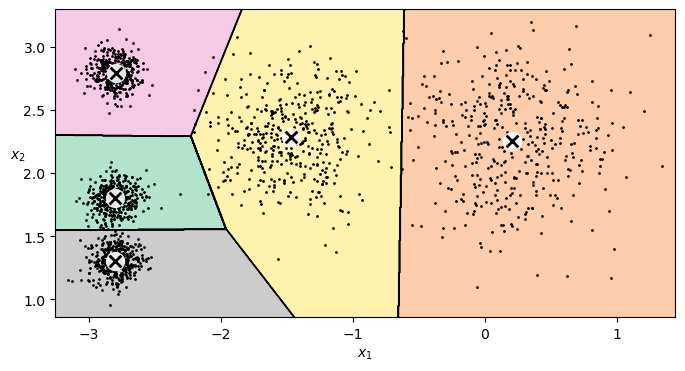

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled, especially near the boundary between the top-left cluster and the central cluster.

Indeed, the k-means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

So, how deos the algorithm work?

- If you know the centroids? No problem!
- But we don't know neither the labels nor the centroids

In fact, we approach recursively

1. Start by placing the centroids randomly (e.g., by picking k instances at random from the dataset and using their locations as centroids). 
2. Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.

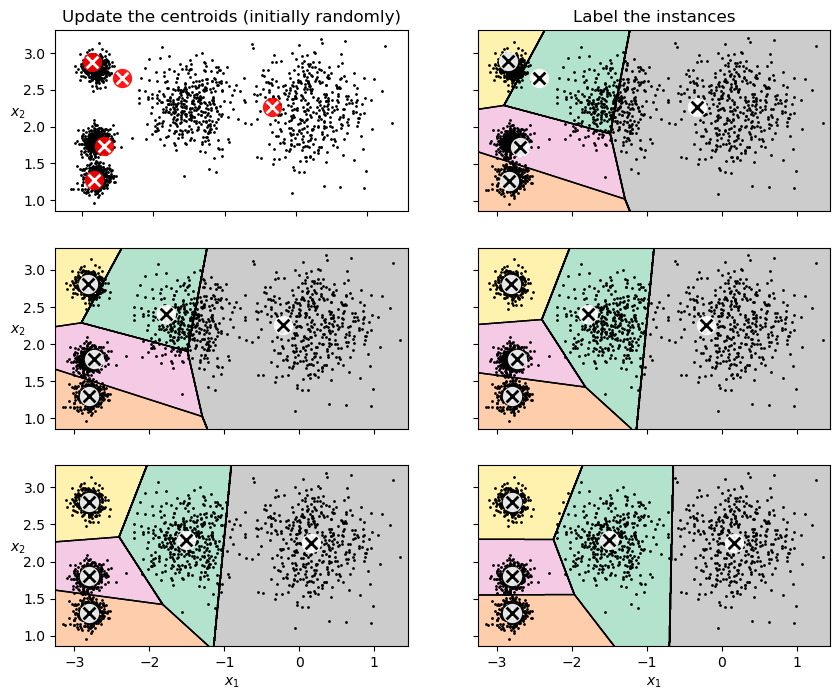

In [19]:
# extra code – this cell generates and saves Figure 9–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.show()

The algorithm is guaranteed to converge in a finite number of steps (usually quite small). That's because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge.

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization

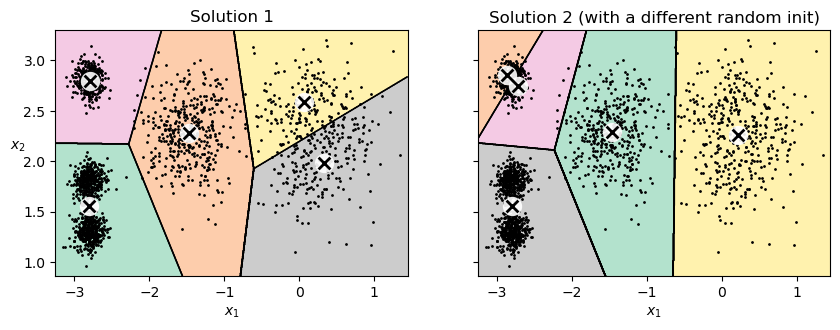

In [20]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")
plt.show()

Let's take a look at a few ways you can mitigate this risk by improving the centroid initialization.

### Centroid initialization methods

One solution is to run the algorithm multiple times with different random initializations and keep the best solution.

The number of random initializations is controlled by `n_init`: by default it is equal to `10`, which means that the whole algorithm described earlier runs 10 times when you call `fit()`, and Scikit-Learn keeps the best solution

But how exactly does it know which solution is the best?

 It uses a performance metric! That metric is called the model's inertia, which is the sum of the squared distances between the instances and their closest centroids

In [21]:
kmeans.inertia_

211.59853725816836

The `KMeans` class runs the algorithm `n_init` times and keeps the model with the lowest inertia

In [22]:
kmeans.score(X)

-211.59853725816836

An important improvement to the k-means algorithm, `k-means++`, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii.⁠ 

They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the k-means algorithm much less likely to converge to a suboptimal solution. The paper showed that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution.

The `KMeans` class uses this initialization method by default.

### The optimal number of clusters

In general, it won't be so easy to know how to set $k$, and the result might be quite bad if you set it to the wrong value

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


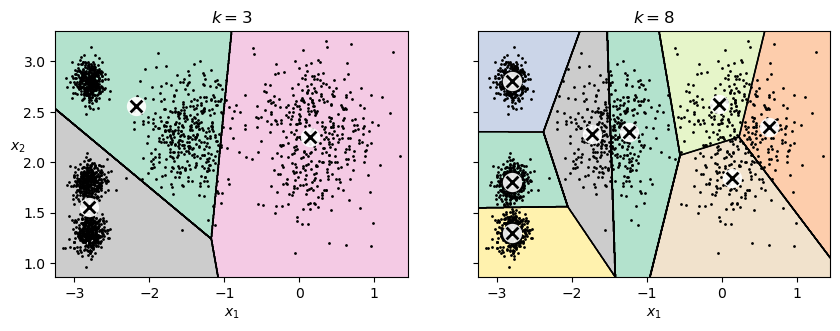

In [23]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

You might be thinking that you could just pick the model with the lowest inertia

- Unfortunately, it is not that simple. 
    - The inertia for $k=3$ is about 653.2, which is much higher than for $k=5$ (211.6) 
    - with $k=8$, the inertia is just 119.1
    - it keeps getting lower as we increase k

Let's plot the inertia as a function of $k$. When we do this, the curve often contains an inflexion point called the **elbow**

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/

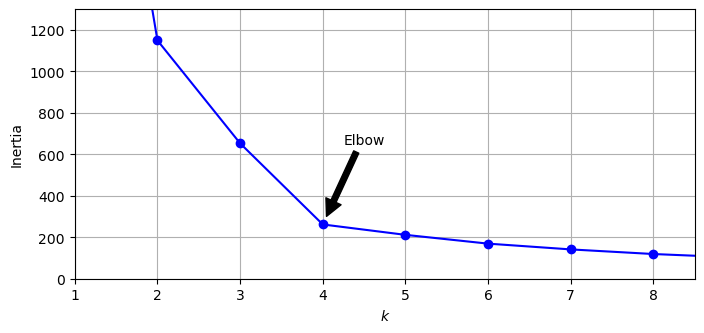

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

- As you can see, the inertia drops very quickly as we increase $k$ up to 4, but then it decreases much more slowly as we keep increasing $k$
    - elbow at $k=4$
    - So, if we did not know better, we might think 4 was a good choice

This technique for choosing the best value for the number of clusters is rather coarse

- A more precise (but also more computationally expensive) approach is to use the silhouette score, which is the mean silhouette coefficient over all the instances
    - An instance’s silhouette coefficient is equal to $(b – a) / \text{max}(a, b)$, where $a$ is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and $b$ is the mean nearest-cluster distance 

- The silhouette coefficient can vary between –1 and +1 
    - 1 means that the instance is well inside its own cluster and far from other clusters
    - 0 means that it is close to a cluster boundary
    - –1 means that the instance may have been assigned to the wrong cluster

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

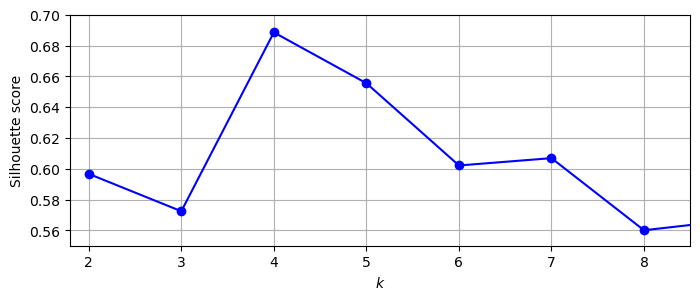

In [26]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

- As you can see, this visualization is much richer than the previous one 
    - although it confirms that $k = 4$ is a very good choice, it also highlights the fact that $k = 5$ is quite good as well, and much better than $k = 6$ or $7$. 
    - This was not visible when comparing inertias.